# 六軸史都華平台模擬

In [1]:
import numpy as np
import pandas as pd
from sympy import *
init_printing(use_unicode=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
%matplotlib inline

### Stewart Func

In [2]:
α, β, γ = symbols('α β γ')
x, y, z = symbols('x y z')
r, R, w, W, t = symbols('r R w W t')

# x, y, z三軸固定軸旋轉矩陣
rotx = lambda θ : Matrix([[1, 0, 0], 
                          [0, cos(θ), -sin(θ)], 
                          [0, sin(θ), cos(θ)]])
roty = lambda θ : Matrix([[cos(θ), 0, sin(θ)], 
                          [0, 1, 0], 
                          [-sin(θ), 0, cos(θ)]])
rotz = lambda θ : Matrix([[cos(θ), -sin(θ), 0], 
                          [sin(θ), cos(θ), 0], 
                          [0, 0, 1]])

# 姿勢產生器 固定座標旋轉
def poses(α, β, γ):
    return rotz(γ)*roty(β)*rotx(α)

# 質心位置產生器
def posit(x, y, z):
    return Matrix([x, y, z])

# Basic 6 軸點設定
def basic(r, w):
    b1 = Matrix([w/2, r, 0])
    b2 = Matrix([-w/2, r, 0])
    b3 = rotz(pi*2/3)*b1
    b4 = rotz(pi*2/3)*b2
    b5 = rotz(pi*2/3)*b3
    b6 = rotz(pi*2/3)*b4
    return [b1, b2, b3, b4, b5, b6]

# 平台 6 軸點設定
def plat(r, w, pos=poses(0, 0, 0), pit=posit(0, 0, 5)):
    p1 = Matrix([-w/2, r, 0])
    p1 = rotz(-pi/3)*p1
    p2 = Matrix([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])*p1
    p3 = rotz(pi*2/3)*p1
    p4 = rotz(pi*2/3)*p2
    p5 = rotz(pi*2/3)*p3
    p6 = rotz(pi*2/3)*p4
    lst = [p1, p2, p3, p4, p5, p6]
    for n in range(6):
        lst[n] = (pos*lst[n]) + pit
    return lst

# 六軸長度
def leng(a, b):
    if a.ndim == 1:
        return (((a - b)**2).sum())**0.5
    else:
        return (((a - b)**2).sum(1))**0.5

### Basic & plane

In [3]:
basic(R, W)

⎡                                        ⎡              ⎛  R   √3⋅W⎞⎤  ⎡      
⎢                                        ⎢           √3⋅⎜- ─ + ────⎟⎥  ⎢      
⎢            ⎡  √3⋅R   W⎤  ⎡  √3⋅R   W⎤  ⎢√3⋅R   W      ⎝  2    4  ⎠⎥  ⎢√3⋅R  
⎢⎡W⎤  ⎡-W ⎤  ⎢- ──── - ─⎥  ⎢- ──── + ─⎥  ⎢──── + ─ - ───────────────⎥  ⎢──── -
⎢⎢─⎥  ⎢───⎥  ⎢   2     4⎥  ⎢   2     4⎥  ⎢ 4     8          2       ⎥  ⎢ 4    
⎢⎢2⎥  ⎢ 2 ⎥  ⎢          ⎥  ⎢          ⎥  ⎢                          ⎥  ⎢      
⎢⎢ ⎥, ⎢   ⎥, ⎢  R   √3⋅W⎥, ⎢  R   √3⋅W⎥, ⎢              ⎛  √3⋅R   W⎞⎥, ⎢      
⎢⎢R⎥  ⎢ R ⎥  ⎢- ─ + ────⎥  ⎢- ─ - ────⎥  ⎢           √3⋅⎜- ──── - ─⎟⎥  ⎢      
⎢⎢ ⎥  ⎢   ⎥  ⎢  2    4  ⎥  ⎢  2    4  ⎥  ⎢R   √3⋅W      ⎝   2     4⎠⎥  ⎢R   √3
⎢⎣0⎦  ⎣ 0 ⎦  ⎢          ⎥  ⎢          ⎥  ⎢─ - ──── + ───────────────⎥  ⎢─ + ──
⎢            ⎣    0     ⎦  ⎣    0     ⎦  ⎢4    8            2       ⎥  ⎢4    8
⎢                                        ⎢                          ⎥  ⎢      
⎣                                        ⎣          

In [4]:
plat(r, w, poses(α, β, γ), posit(x, y, z))

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢⎡    ⎛r   √3⋅w⎞                                          ⎛√3⋅r   w⎞          
⎢⎢x + ⎜─ + ────⎟⋅(sin(α)⋅sin(β)⋅cos(γ) - sin(γ)⋅cos(α)) + ⎜──── - ─⎟⋅cos(β)⋅co
⎢⎢    ⎝2    4  ⎠                                          ⎝ 2     4⎠          
⎢⎢                                                                            
⎢⎢    ⎛r   √3⋅w⎞                                          ⎛√3⋅r   w⎞          
⎢⎢y + ⎜─ + ────⎟⋅(sin(α)⋅sin(β)⋅sin(γ) + cos(α)⋅cos(γ)) + ⎜──── - ─⎟⋅sin(γ)⋅co
⎢⎢    ⎝2    4  ⎠                                    

### 設定α, β, γ, x, y, z 可設定為時間t的函數

In [5]:
pos = poses(sin(2*t), cos(t), 0)
pit = posit(x, y, z)

baspt = basic(R, W)
baspt = np.array(baspt)
pltpt = plat(r, w, pos, pit)
pltpt = np.array(pltpt)

### 6軸的長度 (示範軸1)

In [6]:
length = leng(baspt ,pltpt)

### 設定參數 r = 10, R = 5, w = 2, W = 2, x = 0, y = 0, z = 10

In [7]:
x1 = length[0].subs([(r, 10), (R, 5), (w, 2), (W, 2), (x, 0), (y, 0), (z, 10)])

In [8]:
x1

### 微分一次獲得速度變化

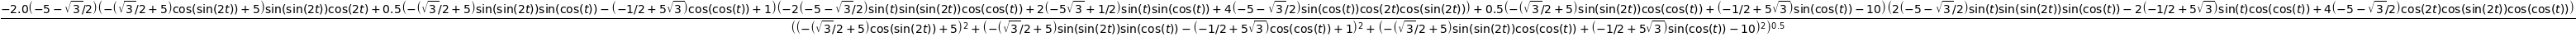

In [9]:
dx1 = diff(x1, t)
dx1

### 微分兩次獲得加速度變化

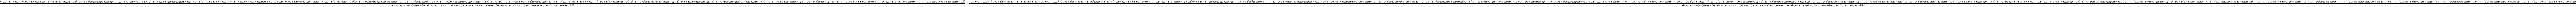

In [10]:
ddx1 = diff(dx1, t)
ddx1

### 畫圖

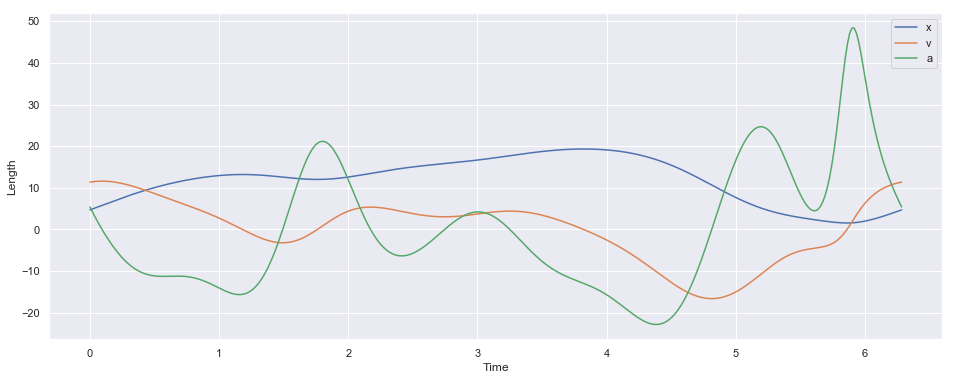

In [11]:
tline = np.linspace(0, 2*np.pi, 361)

xlst = lambdify(t, x1, 'numpy') 
dxlst = lambdify(t, dx1, 'numpy') 
ddxlst = lambdify(t, ddx1, 'numpy') 

plt.rcParams['figure.figsize'] = [16, 6]
plt.plot(tline, xlst(tline), label = 'x')
plt.plot(tline, dxlst(tline), label = 'v')
plt.plot(tline, ddxlst(tline), label = 'a')
plt.ylabel('Length')
plt.xlabel('Time')
plt.legend()